In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import numpy as np
import numpy.linalg as npl
import scipy.linalg as spl
import sklearn.metrics as sklm
import math
import matplotlib.pyplot as plt
import pandas as pd #for debugging

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
def cls_solve(A,b,C,d):
    m,n = np.shape(A)
    p,n = np.shape(C)
    Q,R = npl.qr(np.vstack([A,C]))
    Q1 = Q[0:m,:]
    # print("q1 shape is ",Q1.shape)
    Q2 = Q[m:m+p,:]
    Qtil, Rtil = npl.qr(Q2.T)
    # print("qtil and Rtil")
    # print(Qtil.shape, Rtil.shape)
    first = np.vstack((np.matmul(np.matmul(2*Qtil.T , Q1.T),b)))
    # print("first shape")
    # print(first.shape)
    denom = first - np.vstack((2*(npl.lstsq(Rtil.T, d, rcond=None)[0])))
    k = npl.lstsq(Rtil, denom, rcond=None)[0]
    return npl.lstsq(R, np.vstack(np.matmul(Q1.T, b)) - np.matmul(Q2.T , k)/2, rcond=None)[0]

In [ ]:
def lqe(A, B, C, y1, T, lam,rcond):
    n = A.shape[0]
    m = B.shape[1]
    p = C.shape[0]
    shape1 = (T * p, m * (T - 1))
    # print(shape1)
    Atil = np.block([[np.kron(np.eye(T), C), np.zeros((shape1))], [np.zeros((m * (T - 1), T * n)), np.sqrt(lam) * np.eye(m * (T - 1))]])
    # print(Atil.shape)
    y_flat = y1.T.flatten()
    zeros_part = np.zeros(m * (119))
    btil = np.concatenate((y_flat, zeros_part)).reshape(-1, 1)
    # print(btil.shape)
    Ctil = np.block([np.block([np.kron(np.eye(T - 1), A), np.zeros((n * (T - 1), n))]) + np.block([np.zeros((n * (T - 1), n)), -np.eye(n * (T - 1))]), np.kron(np.eye(T - 1), B)])
    # print(Ctil.shape)
    dtil = np.zeros(n * (T - 1))
    # print(dtil.shape)
    z = cls_solve(Atil, btil, Ctil, dtil)
    # print(type(z))
    x_hat = [z[i * n:(i + 1) * n] for i in range(T)]
    v = [np.random.multivariate_normal(mean=np.zeros(p), cov=np.eye(p)) for _ in range(T)]
    y_hat = [C @ x_t + v_t for x_t, v_t in zip(x_hat, v)]
    return x_hat

array([ 0.01331474, -1.93233198,  0.55279985, -2.02845735])

array([ 0.56611459, -3.96078933, -0.255568  , -0.76081633])

array([ 0.31054659, -4.72160566,  0.57927842, -2.11501446])

array([ 0.88982501, -6.83662011,  1.16779169, -0.22866544])

array([ 2.0576167 , -7.06528556,  1.63338812, -2.22711132])

array([ 3.69100482, -9.29239688,  0.15377453, -0.74450607])

array([  3.84477935, -10.03690295,   0.42636131,  -0.43082914])

array([  4.27114065, -10.46773209,  -2.50588575,   0.63863774])

array([ 1.7652549 , -9.82909435, -1.41827628, -0.66550993])

array([  0.34697862, -10.49460428,  -2.27729203,   0.55465354])

array([-1.93031341, -9.93995074, -1.70198282, -0.80432453])

array([ -3.63229623, -10.74427527,   0.2274426 ,  -1.31215493])

array([ -3.40485363, -12.0564302 ,  -0.12477206,  -1.74036446])

array([ -3.52962569, -13.79679466,   0.41767232,  -2.55272493])

array([ -3.11195337, -16.34951959,  -0.18302269,  -2.4612573 ])

array([ -3.29497606, -18.81077689,   0.80303894,  -2.12445334])

array([ -2.49193713, -20.93523023,   0.48153963,  -2.53068879])

array([ -2.0103975 , -23.46591901,  -1.41380763,  -2.86637489])

array([ -3.42420513, -26.3322939 ,  -0.38195301,  -1.54162458])

array([ -3.80615814, -27.87391849,   0.60233206,  -1.52354973])

array([ -3.20382608, -29.39746822,  -0.62072608,  -3.30995522])

array([ -3.82455216, -32.70742343,  -0.19877834,  -1.85751871])

array([ -4.0233305 , -34.56494214,  -0.11663447,  -1.84721727])

array([ -4.13996497, -36.41215941,  -1.00893527,  -1.04263089])

array([ -5.14890024, -37.45479031,  -1.24716835,  -1.47847115])

array([ -6.39606859, -38.93326146,  -2.14427361,   0.31581004])

array([ -8.5403422 , -38.61745142,  -1.15781774,   1.87688832])

array([ -9.69815994, -36.7405631 ,  -1.81130604,   2.30197089])

array([-11.50946599, -34.43859221,  -2.78137482,   1.73579998])

array([-14.29084081, -32.70279222,  -2.78584098,   1.95799399])

array([-17.07668179, -30.74479823,  -1.94723469,   2.79275068])

array([-19.02391648, -27.95204755,  -0.85959478,   2.131741  ])

array([-19.88351126, -25.82030656,  -1.34021189,   3.19528939])

array([-21.22372316, -22.62501717,  -3.95807297,   3.55970172])

array([-25.18179612, -19.06531544,  -4.55688548,   2.62720524])

array([-29.7386816 , -16.43811021,  -5.52218465,   3.34116224])

array([-35.26086625, -13.09694797,  -4.83185839,   1.55399071])

array([-40.09272465, -11.54295726,  -4.85897712,   0.28641991])

array([-44.95170177, -11.25653735,  -6.13170868,  -0.37624652])

array([-5.10834105e+01, -1.16327839e+01, -4.23762756e+00,  4.61926613e-02])

array([-5.53210380e+01, -1.15865912e+01, -3.91775907e+00, -2.27862992e-03])

array([-59.23879709, -11.58886983,  -4.48392145,  -0.18014952])

array([-63.72271854, -11.76901935,  -3.10970269,  -1.24449307])

array([-66.83242123, -13.01351242,  -2.36920349,  -1.47676159])

array([-69.20162472, -14.49027402,  -3.52426466,  -1.41146482])

array([-72.72588938, -15.90173884,  -4.10614663,  -0.42414306])

array([-76.83203601, -16.32588189,  -6.38491144,  -1.64564979])

array([-83.21694745, -17.97153168,  -5.65848725,  -3.0083253 ])

array([-88.87543469, -20.97985698,  -5.69655937,  -1.5879756 ])

array([-94.57199406, -22.56783258,  -6.77411687,  -1.95002078])

array([-101.34611093,  -24.51785336,   -6.51587974,   -0.19130687])

array([-1.07861991e+02, -2.47091602e+01, -6.33655639e+00,  5.96649975e-02])

array([-1.14198547e+02, -2.46494952e+01, -5.83535399e+00,  1.05532855e-01])

array([-120.03390105,  -24.54396238,   -5.26635206,   -0.30123225])

array([-125.30025311,  -24.84519463,   -5.71415063,   -0.94718421])

array([-131.01440374,  -25.79237884,   -5.33476463,   -1.42962641])

array([-136.34916838,  -27.22200525,   -5.45029397,   -1.868155  ])

array([-141.79946234,  -29.09016025,   -4.35068258,   -3.0036529 ])

array([-146.15014492,  -32.09381315,   -6.0104589 ,   -4.39209788])

array([-152.16060382,  -36.48591103,   -5.97126913,   -4.5741863 ])

array([-158.13187295,  -41.06009733,   -6.64652249,   -4.22922889])

array([-164.77839544,  -45.28932622,   -8.53943187,   -1.4252735 ])

array([-173.31782731,  -46.71459973,   -7.84577882,   -3.02993429])

array([-181.16360613,  -49.74453402,   -8.17100593,   -3.71458784])

array([-189.33461206,  -53.45912186,   -6.342397  ,   -1.37009348])

array([-195.67700905,  -54.82921534,   -6.82167203,   -1.31852527])

array([-202.49868109,  -56.14774061,   -7.15489186,   -1.07225115])

array([-209.65357294,  -57.21999176,   -7.01141122,   -1.24794722])

array([-216.66498416,  -58.46793898,   -6.25075037,   -1.77539691])

array([-222.91573454,  -60.24333589,   -7.0163332 ,   -1.71613265])

array([-229.93206774,  -61.95946853,   -6.71217736,   -2.28858533])

array([-236.6442451 ,  -64.24805386,   -5.9427261 ,   -1.96811169])

array([-242.5869712 ,  -66.21616556,   -7.17746748,   -2.59105519])

array([-249.76443868,  -68.80722075,   -6.63877621,   -3.71802754])

array([-256.40321488,  -72.52524829,   -7.15685137,   -3.30027005])

array([-263.56006626,  -75.82551833,   -6.52181706,   -3.75913277])

array([-270.08188332,  -79.5846511 ,   -6.12839435,   -5.4908893 ])

array([-276.21027768,  -85.0755404 ,   -6.33189054,   -6.48333715])

array([-282.54216821,  -91.55887755,   -6.76396545,   -4.09658715])

array([-289.30613366,  -95.6554647 ,   -4.83933644,   -4.95045582])

array([-294.14547011, -100.60592053,   -4.41802696,   -4.33635874])

array([-298.56349707, -104.94227927,   -3.26128373,   -2.04175965])

array([-301.8247808 , -106.98403892,   -1.92688521,   -3.51521975])

array([-303.75166601, -110.49925867,   -2.35355498,   -4.87738522])

array([-306.10522099, -115.37664389,   -4.06295736,   -6.93140359])

array([-310.16817835, -122.30804748,   -3.36348942,   -8.23852558])

array([-313.53166777, -130.54657306,   -3.66980258,   -8.89073042])

array([-317.20147035, -139.43730347,   -3.60740333,   -8.43094841])

array([-320.80887368, -147.86825188,   -4.47395414,   -6.58494182])

array([-325.28282782, -154.4531937 ,   -5.64960873,   -7.55249881])

array([-330.93243654, -162.00569251,   -5.3986461 ,   -7.06349094])

array([-336.33108264, -169.06918345,   -4.9054382 ,   -4.26724834])

array([-341.23652084, -173.33643179,   -2.7620459 ,   -4.53373416])

array([-343.99856674, -177.87016595,   -4.73933863,   -5.88959285])

array([-348.73790537, -183.7597588 ,   -5.58361121,   -5.87279028])

array([-354.32151658, -189.63254907,   -7.47649938,   -5.63001019])

array([-361.79801596, -195.26255927,  -10.12754484,   -5.29717586])

array([-371.9255608 , -200.55973513,   -8.55212168,   -6.4788217 ])

array([-380.47768248, -207.03855683,   -8.16302453,   -6.18113927])

numpy.ndarray

numpy.ndarray

Text(0.5, 0, 'Lambda')

Text(0, 0.5, 'RMS Error')

Text(0.5, 1.0, 'RMS Error vs. Lambda')

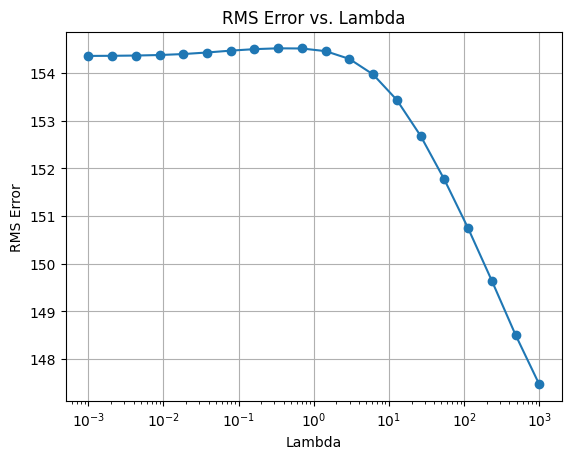

In [ ]:
lambda_values = np.logspace(-3, 3, num=20)
A = np.block([[np.eye(2), np.eye(2)], [np.zeros((2, 2)), np.eye(2)]])
B = np.block([[np.zeros((2, 2))], [np.eye(2)]])
C = np.block([[np.eye(2), np.zeros((2, 2))]])
n, m, K = A.shape[0], B.shape[1], C.shape[0]
P = np.eye(m)
R = np.eye(K)
Q = np.eye(n)
T = 100
w = [np.random.multivariate_normal(mean=np.zeros(m), cov=P) for _ in range(T)]
v = [np.random.multivariate_normal(mean=np.zeros(K), cov=R) for _ in range(T)]
x = [np.random.multivariate_normal(mean=np.zeros(n), cov=Q)]
def calculate_x_next(t, x, w, A, B):
    if t == 0:
        return x[0]  # Return the initial condition if t=0
    else:
        # Calculate x[t] if it hasn't been calculated yet
        if len(x) <= t:
            x.append(A @ calculate_x_next(t-1, x, w, A, B) + B @ w[t-1])
        return x[t]

# Calculating x for each timestep up to T
for t in range(1, T):
    calculate_x_next(t, x, w, A, B)

y = [C @ x[t] + v[t] for t in range(T)]
y1 = np.concatenate(y)
T = 100
rcond=-1
type(y1)
y=np.array(y1)
type(y)
y_train, y_test = train_test_split(y1, test_size=0.2, random_state=42)


rms_errors = []

for lam in lambda_values:
    # Apply LQE to estimate states based on training data
    x_hat = lqe(A, B, C, y_train, T, lam, rcond=-1)

    # Simulate reconstruction of missing observations (actual implementation depends on LQE output)
    y_reconstructed = C @ x_hat[-20:]  # Assuming x_hat is structured correctly

    # Calculate RMS error for the reconstructed observations
    rms_error = np.sqrt(np.mean((y_test - y_reconstructed.flatten())**2))
    rms_errors.append(rms_error)

# Plot RMS error vs. lambda
plt.semilogx(lambda_values, rms_errors, marker='o', label='Test RMS Error')
plt.xlabel('Lambda')
plt.ylabel('RMS Error')
plt.title('RMS Error vs. Lambda')
plt.grid(True)
plt.show()



training data  0.8936640201867438 101.06203302960469
testing data  147.47188230509929 154.5197435942796


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Lambda')

Text(0, 0.5, 'RMS Error')

Text(0.5, 1.0, 'RMS Error vs. Lambda for Training and Testing Datasets')

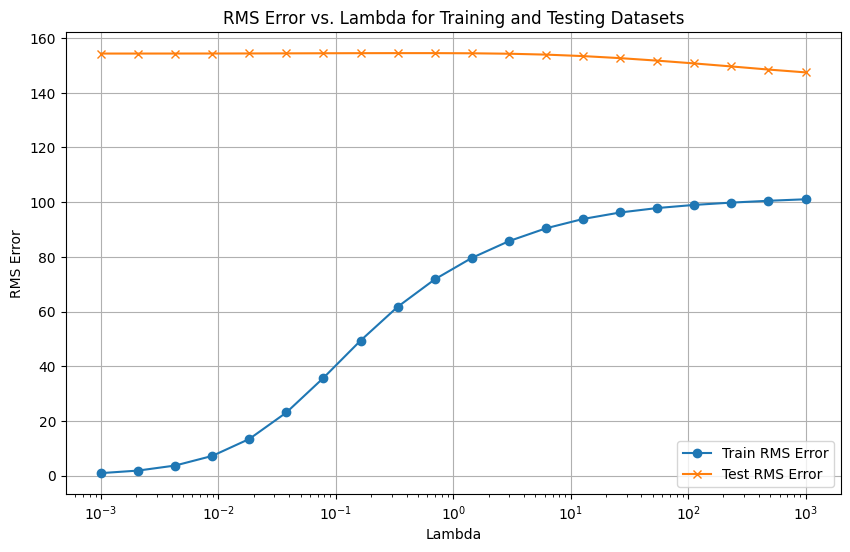

In [ ]:
lambda_values = np.logspace(-3, 3, num=20)
train_rms_errors = []
test_rms_errors = []
for lam in lambda_values:
    # Simulated application of LQE to estimate states based on training data
    x_hat = lqe(A, B, C, y_train, T, lam, rcond=-1)

    # Simulate reconstruction of observations for both training and testing (replace with actual implementation)
    y_reconstructed_train = C @ x_hat[:-20]  # Assuming x_hat and split logic correctly match your setup
    y_reconstructed_test = C @ x_hat[-20:]   # Adjust indices based on your actual data split

    # Calculate RMS error for training and testing datasets
    train_rms_error = np.sqrt(np.mean((y_train - y_reconstructed_train.flatten())**2))
    test_rms_error = np.sqrt(np.mean((y_test - y_reconstructed_test.flatten())**2))

    # Append RMS errors to their respective lists
    train_rms_errors.append(train_rms_error)
    test_rms_errors.append(test_rms_error)

print("training data ",min(train_rms_errors),max(train_rms_errors))
print("testing data ",min(test_rms_errors),max(test_rms_errors))
# Plotting RMS error vs. lambda for both training and testing datasets
plt.figure(figsize=(10, 6))
plt.semilogx(lambda_values, train_rms_errors, marker='o', label='Train RMS Error')
plt.semilogx(lambda_values, test_rms_errors, marker='x', label='Test RMS Error')
plt.xlabel('Lambda')
plt.ylabel('RMS Error')
plt.title('RMS Error vs. Lambda for Training and Testing Datasets')
plt.legend()
plt.grid(True)
plt.show()

training data  0.8936640201867438 101.06203302960469
testing data  147.47188230509929 154.5197435942796


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Lambda')

Text(0, 0.5, 'RMS Error')

Text(0.5, 1.0, 'RMS Error vs. Lambda for Training and Testing Datasets')

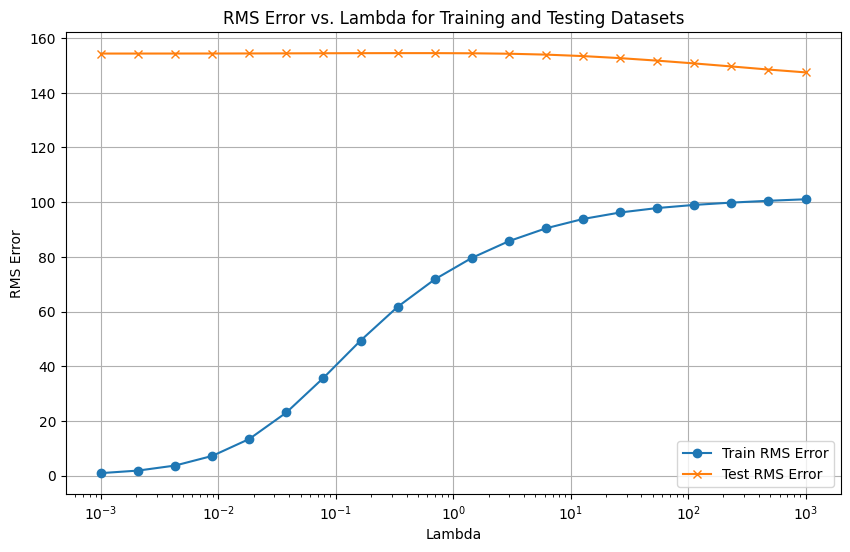

In [ ]:
train_rms_errors = []
test_rms_errors = []
for lam in lambda_values:
    # Simulated application of LQE to estimate states based on training data
    x_hat = lqe(A, B, C, y_train, T, lam, rcond=-1)

    # Simulate reconstruction of observations for both training and testing (replace with actual implementation)
    y_reconstructed_train = C @ x_hat[:int(len(x_hat)*0.8)]  # Assuming x_hat and split logic correctly match your setup
    y_reconstructed_test = C @ x_hat[int(len(x_hat)*0.8):]   # Adjust indices based on your actual data split

    # Calculate RMS error for training and testing datasets
    train_rms_error = np.sqrt(np.mean((y_train - y_reconstructed_train.flatten())**2))
    test_rms_error = np.sqrt(np.mean((y_test - y_reconstructed_test.flatten())**2))

    # Append RMS errors to their respective lists
    train_rms_errors.append(train_rms_error)
    test_rms_errors.append(test_rms_error)

print("training data ",min(train_rms_errors),max(train_rms_errors))
print("testing data ",min(test_rms_errors),max(test_rms_errors))
# Plotting RMS error vs. lambda for both training and testing datasets
plt.figure(figsize=(10, 6))
plt.semilogx(lambda_values, train_rms_errors, marker='o', label='Train RMS Error')
plt.semilogx(lambda_values, test_rms_errors, marker='x', label='Test RMS Error')
plt.xlabel('Lambda')
plt.ylabel('RMS Error')
plt.title('RMS Error vs. Lambda for Training and Testing Datasets')
plt.legend()
plt.grid(True)
plt.show()